In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import pytorch_lightning as pl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sys

In [7]:
sys.path.append('../../../')

In [8]:
with open('../data/df_mcc_features.np', 'rb') as f:
    np_features = pickle.load(f)

In [9]:
data_orig = torch.from_numpy(np_features).unsqueeze(0).float()

In [10]:
B, T, C = data_orig.shape  # Batch, Timeline, Channels
B, T, C

(1, 457, 100)

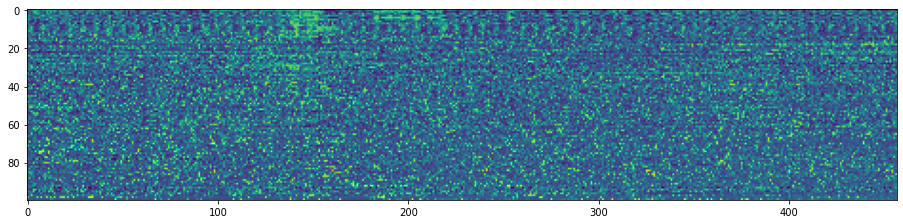

In [11]:
a = data_orig[0].abs()
a = np.clip(a, *np.percentile(a, [5, 95], axis=0))
a = a - a.mean(dim=0, keepdims=True)
a = a / a.std(dim=0, keepdims=True)

plt.figure(figsize=(16, 16 * C / T))
plt.imshow(a.T)
plt.show()

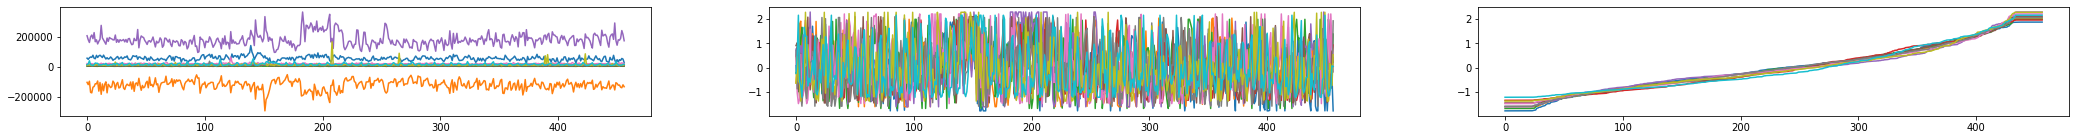

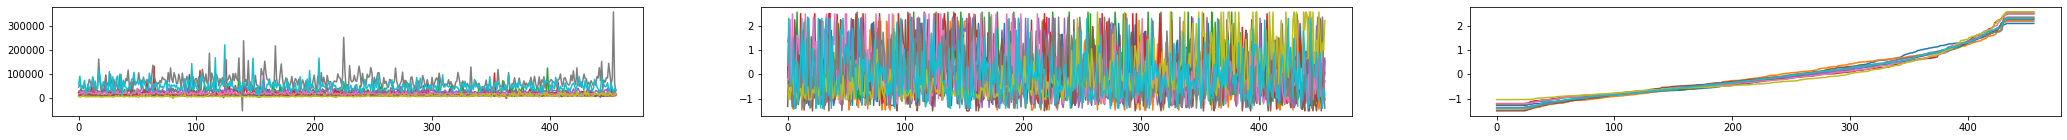

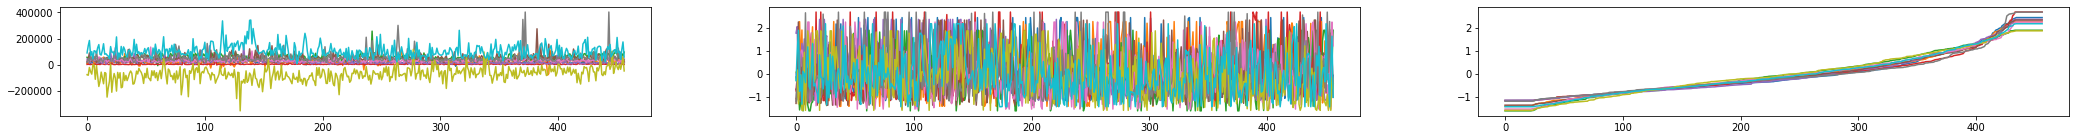

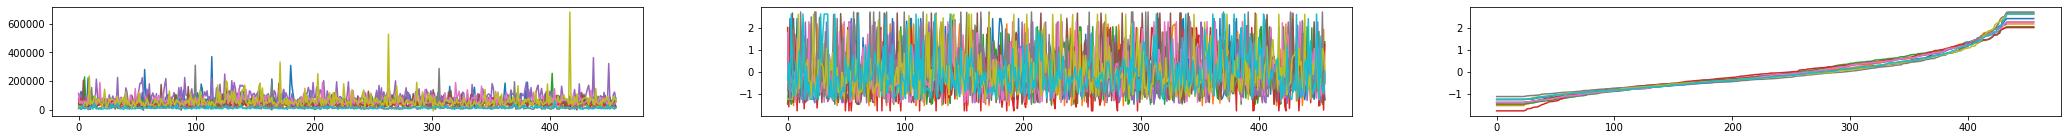

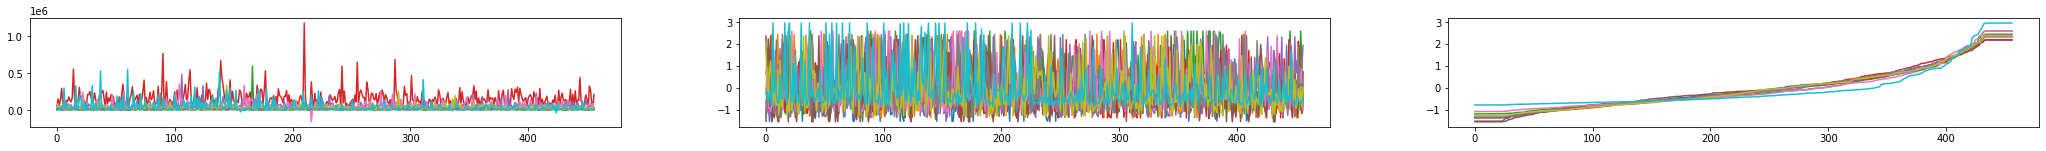

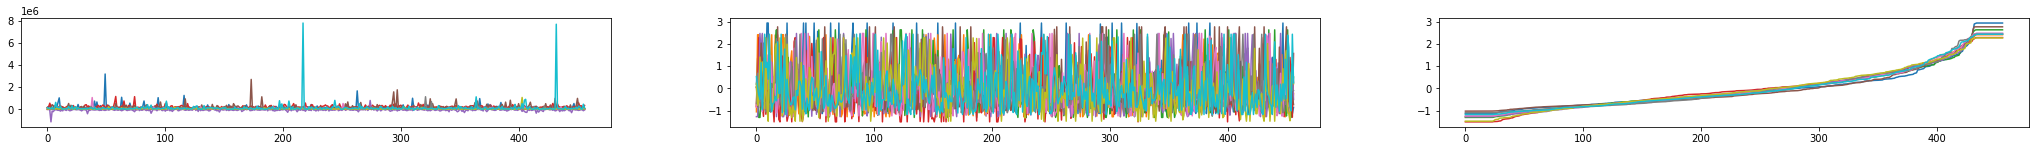

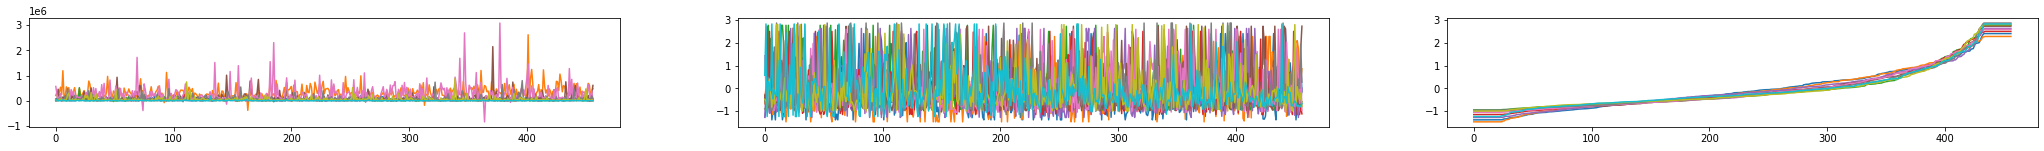

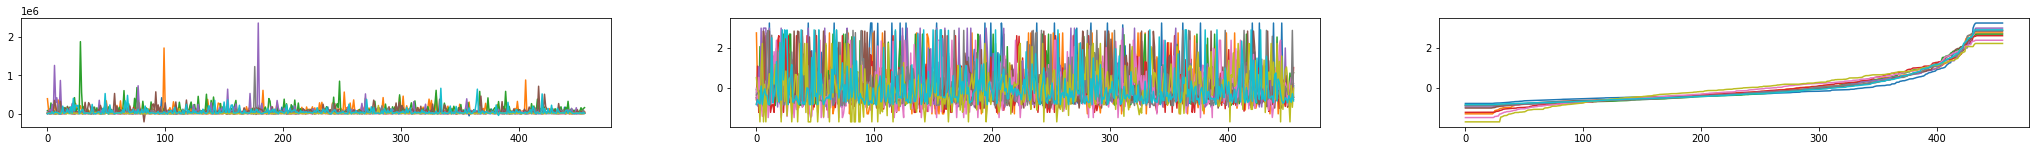

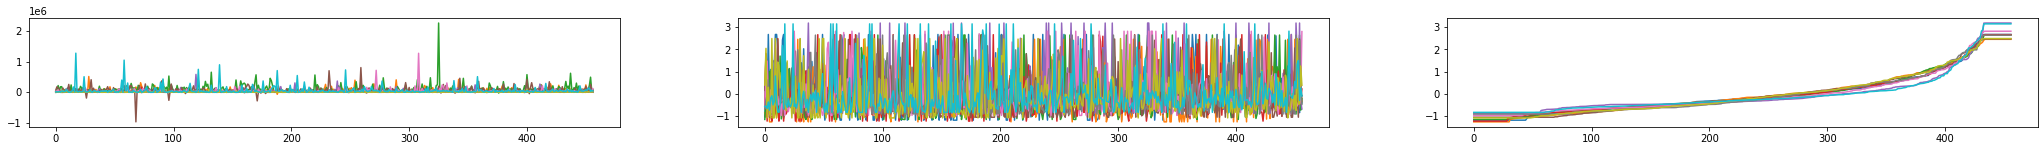

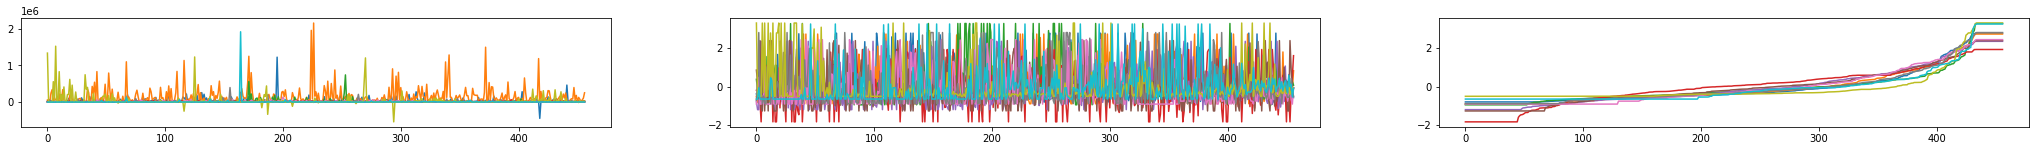

In [12]:
for i in range(0, 100, 10):
    _, axs = plt.subplots(1, 3, figsize=(36, 2))
    axs[0].plot(data_orig[0, :, i:i+10])
    axs[1].plot(a[:, i:i+10])
    for j in range(10):
        v = a[:, i:i+10][:, j]
        v = torch.sort(v).values
        axs[2].plot(v)
    plt.show()

In [13]:
from dltranz.lightning_modules.stream_encoder import *

In [14]:
import logging
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

# Run

In [15]:
!rm -r lightning_logs

In [16]:
# for mcc
model = StreamEncoder(
    history_size=28, predict_size=3,
    in_channels=100, clip_range=(-2.5, 2.5),
    h_channels=32, p_dropout=0, z_channels=32,
    c_channels=32, 
    var_gamma_z=0.5, var_gamma_c=0.2,
    lr=0.001, weight_decay=0.0001, step_size=25, gamma=0.8,
    cpc_w=0.1, cov_z_w=0.0, var_z_w=0.0, cov_c_w=2.0, var_c_w=0.4,
)

In [17]:
trainer = pl.Trainer(
    gpus=[3],
    max_epochs=100,
    log_every_n_steps=10,
    progress_bar_refresh_rate=50, weights_summary=None,
    logger=pl.loggers.TensorBoardLogger(
        save_dir='lightning_logs/',
        default_hp_metric=False,
    )
)

In [18]:
l3dt = Loader3DTensor(model)
train_dl = l3dt.get_train_dataloader(data_orig[:, :180, :], 32, 6)
valid_dl = l3dt.get_valid_dataloader(data_orig[:, 180 - 28:, :], 1, 0)

In [19]:
batch = next(iter(train_dl))[0]

In [20]:
trainer.fit(model, train_dataloader=train_dl, val_dataloaders=valid_dl)

Validation sanity check: 0it [00:00, ?it/s]

pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Tuning

In [21]:
def r_exp(b, m):
    a = b / m
    b = b * m
    a = np.log(a)
    b = np.log(b)
    
    return np.exp(np.random.random(1)[0] * (b - a) + a)

In [28]:
mul_c = 100.0
for i in range(30):
    params = dict(
        lr=r_exp(0.001, mul_c),
        weight_decay=0.0 if np.random.random(1)[0] > 0.5 else r_exp(0.001, mul_c),
        cpc_w=0.1,
        cov_z_w=r_exp(0.1, mul_c),
        var_z_w=r_exp(0.1, mul_c),
        cov_c_w=r_exp(0.1, mul_c),
        var_c_w=r_exp(0.1, mul_c),
        z_channels=np.random.choice(np.arange(2, 32, 2), 1)[0],
        p_dropout=0 if np.random.random(1)[0] > 0.5 else np.random.random() / 10,
    )
    print(f'[{i:04d}] - start', end='')
    stream_encoder = StreamEncoder(  
        history_size=28, predict_size=3,
        in_channels=100, clip_range=(-2.5, 2.5),
        h_channels=params['z_channels'] * 2,
        c_channels=48,
        var_gamma_z=0.5, var_gamma_c=0.2,
        step_size=25, gamma=0.8,
        **params,
    )
    trainer = pl.Trainer(
        gpus=[3],
        max_epochs=100,
        log_every_n_steps=50,
        progress_bar_refresh_rate=0, weights_summary=None,
        logger=pl.loggers.TensorBoardLogger(
            save_dir='lightning_logs/',
            default_hp_metric=False,
        )
    )

    trainer.fit(stream_encoder, train_dataloader=train_dl, val_dataloaders=valid_dl)
    print(' - done')

[0000] - start - done
[0001] - start - done
[0002] - start - done
[0003] - start - done
[0004] - start - done
[0005] - start - done
[0006] - start - done
[0007] - start - done
[0008] - start - done
[0009] - start - done
[0010] - start - done
[0011] - start - done
[0012] - start - done
[0013] - start - done
[0014] - start - done
[0015] - start - done
[0016] - start - done
[0017] - start - done
[0018] - start - done
[0019] - start - done
[0020] - start - done
[0021] - start - done
[0022] - start - done
[0023] - start - done
[0024] - start - done
[0025] - start - done
[0026] - start - done
[0027] - start - done
[0028] - start - done
[0029] - start - done


In [37]:
best_model = StreamEncoder.load_from_checkpoint(
    'lightning_logs/default/version_195/checkpoints/epoch=99-step=499.ckpt')

In [38]:
mul_c = 1.2
for i in range(20):
    params = dict(
        lr=r_exp(best_model.hparams.lr, mul_c),
        weight_decay=0.0 if np.random.random(1)[0] > 0.5 else r_exp(0.001, mul_c),
        cpc_w=0.1,
        cov_z_w=r_exp(best_model.hparams.cov_z_w, mul_c),
        var_z_w=r_exp(best_model.hparams.var_z_w, mul_c),
        cov_c_w=r_exp(best_model.hparams.cov_c_w, mul_c),
        var_c_w=r_exp(best_model.hparams.var_c_w, mul_c),
        z_channels=np.random.choice(np.arange(2, 20, 2), 1)[0],
        p_dropout=0 if np.random.random(1)[0] > 0.5 else np.random.random() / 10,
    )
    print(f'[{i:04d}] - start', end='')
    stream_encoder = StreamEncoder(  
        history_size=28, predict_size=3,
        in_channels=100, clip_range=(-2.5, 2.5),
        h_channels=params['z_channels'] * 2,
        c_channels=48,
        var_gamma_z=0.5, var_gamma_c=0.2,
        step_size=25, gamma=0.8,
        **params,
    )
    trainer = pl.Trainer(
        gpus=[3],
        max_epochs=100,
        log_every_n_steps=50,
        progress_bar_refresh_rate=0, weights_summary=None,
        logger=pl.loggers.TensorBoardLogger(
            save_dir='lightning_logs/',
            default_hp_metric=False,
        )
    )

    trainer.fit(stream_encoder, train_dataloader=train_dl, val_dataloaders=valid_dl)
    print(' - done')

[0000] - start - done
[0001] - start - done
[0002] - start - done
[0003] - start - done
[0004] - start - done
[0005] - start - done
[0006] - start - done
[0007] - start - done
[0008] - start - done
[0009] - start - done
[0010] - start - done
[0011] - start - done
[0012] - start - done
[0013] - start - done
[0014] - start - done
[0015] - start - done
[0016] - start - done
[0017] - start - done
[0018] - start - done
[0019] - start - done


# Inference

In [39]:
model = StreamEncoder.load_from_checkpoint('lightning_logs/default/version_218/checkpoints/epoch=99-step=499.ckpt')
print(model.hparams)

"c_channels":   48
"clip_range":   (-2.5, 2.5)
"cov_c_w":      1.3302516906074129
"cov_z_w":      0.8812194066458361
"cpc_w":        0.1
"gamma":        0.8
"h_channels":   20
"history_size": 28
"in_channels":  100
"lr":           0.00033883163000785767
"p_dropout":    0.0452924638593024
"predict_size": 3
"step_size":    25
"var_c_w":      22.016286011566223
"var_gamma_c":  0.2
"var_gamma_z":  0.5
"var_z_w":      0.0756232428198664
"weight_decay": 0.0
"z_channels":   10


# Eval

In [45]:
pred_horizon = 3
model.eval()

# data_norm, z, c = [torch.cat(v, dim=1) for v in zip(model(data_orig[:, :200]), model(data_orig[:, 200:]))]
data_norm, z, c = model(data_orig)
# data_norm, z, c = model(data_sin)
p = model.lin_predictors_c2p[pred_horizon - 1](c)

In [46]:
data_norm, z, c, p = [t for t in [data_norm, z, c, p]]

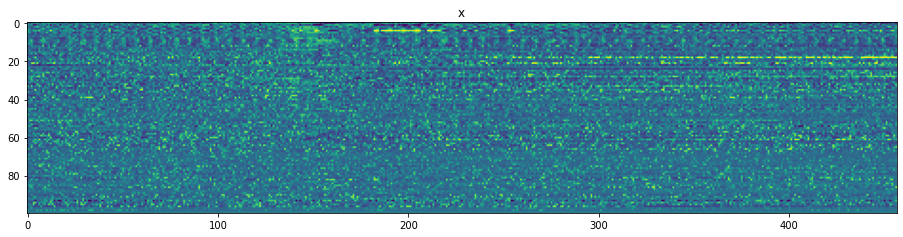

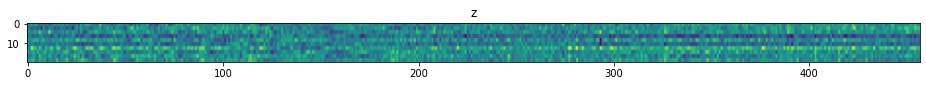

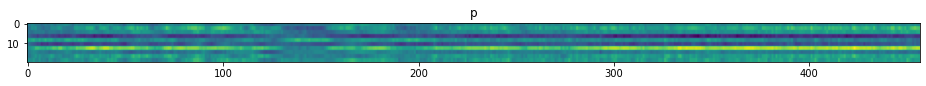

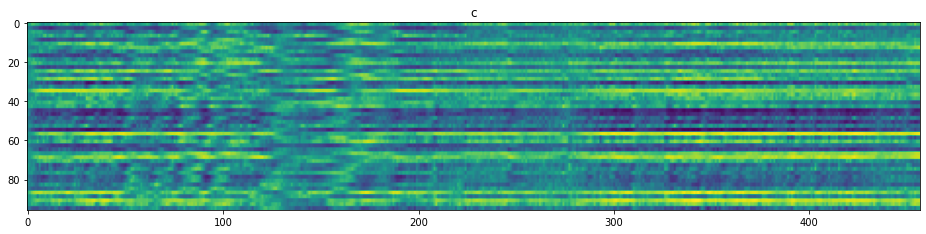

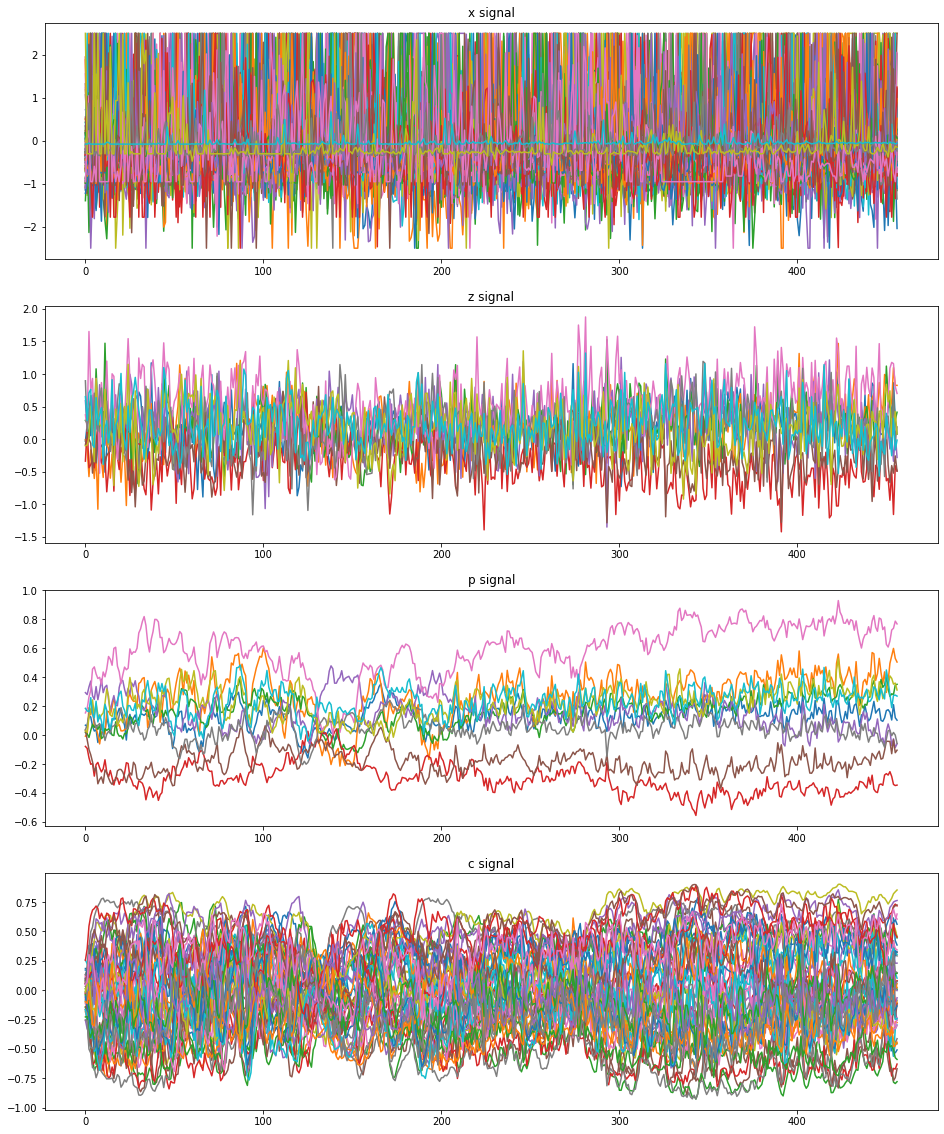

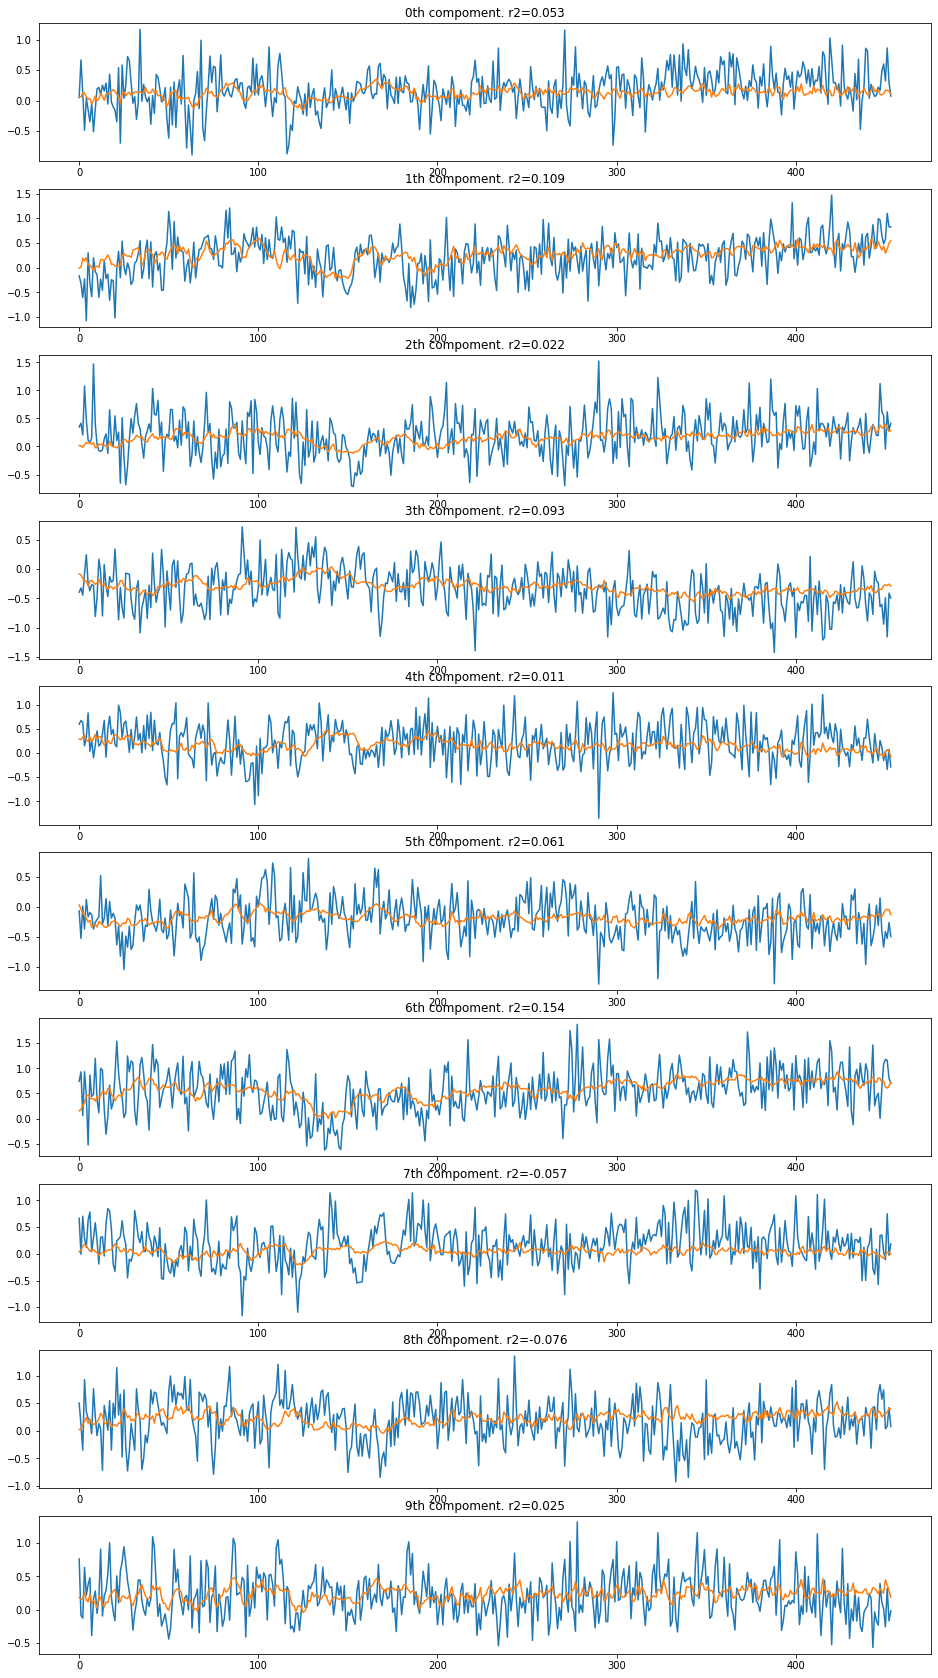

r2_score = 0.039
z_self_corr = 0.166
z_unique_features = 4.003
cpc_pow = 0.158


In [47]:
a = data_norm[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(np.clip(a, *np.quantile(a, [0.05, 0.95], axis=0)).T)
plt.title('x')
plt.show()

a = z.unsqueeze(-1).repeat(1, 1, 1, 2).view(*z.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * 2 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('z')
plt.show()

a = p.unsqueeze(-1).repeat(1, 1, 1, 2).view(*z.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * 2 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('p')
plt.show()

a = c.unsqueeze(-1).repeat(1, 1, 1, 2).view(*z.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * 2 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('c')
plt.show()

_, axs = plt.subplots(4, 1, figsize=(16, 5 * 4))
axs[0].plot(data_norm[0].detach().numpy())
axs[0].set_title('x signal')
axs[1].plot(z[0].detach().numpy())
axs[1].set_title('z signal')
axs[2].plot(p[0].detach().numpy())
axs[2].set_title('p signal')
axs[3].plot(c[0].detach().numpy())
axs[3].set_title('c signal')
plt.show()


_, axs = plt.subplots(z.size(2), 1, figsize=(16, 3 * z.size(2)))
for i, ax in zip(range(z.size(2)), axs):
    ax.plot(z[0, pred_horizon:, i].detach().numpy())
    ax.plot(p[0, :-pred_horizon, i].detach().numpy())
    r2_score = torch.where(
        z[0, pred_horizon:, i].var() * (z.size(1) - pred_horizon) > 1e-6,
        1 - (z[0, pred_horizon:, i] - p[0, :-pred_horizon, i]).pow(2).sum() / 
            z[0, pred_horizon:, i].var() / (z.size(1) - pred_horizon),
        torch.tensor([0.0]),
    )
    ax.set_title(f'{i}th compoment. r2={r2_score.item():.3f}')
plt.show()

r2_score = torch.where(
    z[:, pred_horizon:, :].var(dim=1) / (z.size(1) - pred_horizon) > 1e-6,
    1 - (z[:, pred_horizon:] - p[:, :-pred_horizon]).pow(2).sum(dim=1) / 
        z[:, pred_horizon:, :].var(dim=1) / (z.size(1) - pred_horizon),
    torch.tensor([0.0]),
)
print(f'r2_score = {r2_score.mean():.3f}')

_z = (z - z.mean(dim=1, keepdims=True)) / (z.std(dim=1, keepdims=True) + 1e-6)
mc = torch.bmm(_z.transpose(1, 2), _z).abs() / _z.size(1)
C = mc.size(1)
off_diag_ix = (1 - torch.eye(C)).bool().view(-1)
m = mc.view(-1, C * C)[:, off_diag_ix].mean()
print(f'z_self_corr = {m:.3f}')
print(f'z_unique_features = {1 / (mc.mean() + 1e-3):.3f}', )
print(f'cpc_pow = {r2_score.mean() / (mc.mean() + 1e-3):.3f}')

In [48]:
data_norm, z, c = model(data_orig)

In [49]:
with open('../data/df_mcc_features_zc_05.np', 'wb') as f:
    pickle.dump((z.detach().numpy(), c.detach().numpy()), f)